# Questions 

1. Load in the dataset (`starbucks_drinkMenu_expanded.csv`), calling it `drinks_content`, and then briefly explore it, printing out: first 5 rows, last 5 rows, and then all of the data. Find out the dimensions of the data (number of rows and columns) and the column names.

2. We're going to be looking at the number of `Calories` in each drink.
Calculate some quick summary statistics (e.g. the mean, the maximum and minimum). 

3. Select the variables `Beverage_category`, `Beverage`, `Beverage prep` and `Calories` from the `drinks_content` data frame, and assign the selected columns to a new data frame called `drinks`. Check if there are any missing  values anywhere in the data, and drop any rows containing them if there are.

4. In your `drinks` dataframe create a new variable (column) called `calorie_diff`, which stores the difference between 135 calories (135 calories = 10 cubes of sugar!) and the calories in each drink. (Hint: you’ll want to subtract the calories from 135 to see which drinks have more or less than 10 cubes of sugar).

5. Summarise the mean number of calories in each beverage category.

6. **Harder** - Which `Beverage_prep` type contains more than the average calories of all drinks?
(Hint: to answer this, you’ll have to first figure out what the average calories across all drinks are, and then use that as a filter for the grouped Beverage_prep data).

7. **Harder**  - Which is the best type of **coffee drink** to get if you’re worried about consuming too many calories?  (Hint: you can use pd.unique() on a column to get all unique values/levels of that column! Also remember that you can use isin() to subset with a list)

8. Filter the dataset drinks so we only take "Classic Espresso Drinks", and save this in a new data frame called `espresso_drinks`.

9. Group your `espresso_drinks` data frame by the type of `Beverage prep`, and then find out the mean calories for each drink group.

10. Get the same grouped mean `Calories` values as above, but this time sorted in descending order. (Hint: so you're able to sort the resulting groupby by the 'Calories' column you will want to ensure you get back a dataframe and not a series)

# Extension

Now, play around with the data yourself. Is there anything in the data? Any interesting plots you can make?

------------------------------------------------------------------------------------------------------------------------------

# Homework resolution

In [4]:
import pandas as pd
import numpy as np

# Question 1
Load in the dataset (starbucks_drinkMenu_expanded.csv), calling it drinks_content, and then briefly explore it, printing out: first 5 rows, last 5 rows, and then all of the data. Find out the dimensions of the data (number of rows and columns) and the column names.

In [5]:
drinks_content = pd.read_csv("data/starbucks_drinkMenu_expanded.csv")

In [6]:
# first 5 rows
drinks_content.head(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [7]:
# last 5 rows
drinks_content.tail(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [8]:
# dimensions of the data (number of rows and columns) 
drinks_content.shape

(242, 18)

In [9]:
# column names
drinks_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [11]:
# column names
drinks_content.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

# Question 2

We're going to be looking at the number of Calories in each drink. Calculate some quick summary statistics (e.g. the mean, the maximum and minimum).

In [27]:
#General stats

print(drinks_content.Calories.max())
print(drinks_content.Calories.min())
print(drinks_content.Calories.mean())
print(drinks_content.Calories.describe())

510
0
193.87190082644628
count    242.000000
mean     193.871901
std      102.863303
min        0.000000
25%      120.000000
50%      185.000000
75%      260.000000
max      510.000000
Name: Calories, dtype: float64


In [24]:
# mean of calories for each beverage category

(
drinks_content
    .groupby("Beverage_category")
    .Calories
    .mean()
)

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [134]:
(
drinks_content
    .groupby("Beverage_category")
    .Calories
    .max()
    .reset_index(name="max_cal_category")
).sort_values("max_cal_category", ascending = False)

,Beverage_category,max_cal_category
6,Signature Espresso Drinks,510
2,Frappuccino® Blended Coffee,460
8,Tazo® Tea Drinks,450
3,Frappuccino® Blended Crème,350
0,Classic Espresso Drinks,340
7,Smoothies,300
4,Frappuccino® Light Blended Coffee,290
5,Shaken Iced Beverages,190
1,Coffee,5


In [135]:
(
drinks_content
    .groupby("Beverage_category")
    .Calories
    .min()
    .reset_index(name="min_cal_category")
).sort_values("min_cal_category", ascending = False)

,Beverage_category,min_cal_category
7,Smoothies,260
3,Frappuccino® Blended Crème,170
2,Frappuccino® Blended Coffee,160
6,Signature Espresso Drinks,100
4,Frappuccino® Light Blended Coffee,90
5,Shaken Iced Beverages,60
0,Classic Espresso Drinks,5
1,Coffee,3
8,Tazo® Tea Drinks,0


# Question 3

Select the variables Beverage_category, Beverage, Beverage prep and Calories from the drinks_content data frame, and assign the selected columns to a new data frame called drinks. Check if there are any missing values anywhere in the data, and drop any rows containing them if there are.

In [43]:
drinks = drinks_content.loc[:, ["Beverage_category", "Beverage", "Beverage_prep", "Calories"]]

In [44]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories
0,Coffee,Brewed Coffee,Short,3
1,Coffee,Brewed Coffee,Tall,4
2,Coffee,Brewed Coffee,Grande,5
3,Coffee,Brewed Coffee,Venti,5
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70
...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180


In [45]:
drinks.isna().sum()

Beverage_category    0
Beverage             0
Beverage_prep        0
Calories             0
dtype: int64

# Question 4

In your drinks dataframe create a new variable (column) called calorie_diff, which stores the difference between 135 calories (135 calories = 10 cubes of sugar!) and the calories in each drink. (Hint: you’ll want to subtract the calories from 135 to see which drinks have more or less than 10 cubes of sugar).

In [128]:
drinks["calorie_diff"] = 135-drinks.Calories

In [129]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,calorie_diff
0,Coffee,Brewed Coffee,Short,3,132
1,Coffee,Brewed Coffee,Tall,4,131
2,Coffee,Brewed Coffee,Grande,5,130
3,Coffee,Brewed Coffee,Venti,5,130
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,65
...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,-185
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,-35
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,-65
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,-45


# Question 5

Summarise the mean number of calories in each beverage category.

In [58]:
(
drinks
    .groupby("Beverage_category")
    .Calories
    .mean()
    .reset_index(name = "mean_calories")
)

,Beverage_category,mean_calories
0,Classic Espresso Drinks,140.172414
1,Coffee,4.250000
2,Frappuccino® Blended Coffee,276.944444
3,Frappuccino® Blended Crème,233.076923
4,Frappuccino® Light Blended Coffee,162.500000
5,Shaken Iced Beverages,114.444444
6,Signature Espresso Drinks,250.000000
7,Smoothies,282.222222
8,Tazo® Tea Drinks,177.307692


# Question 6   

Harder - Which Beverage_prep type contains more than the average calories of all drinks? (Hint: to answer this, you’ll have to first figure out what the average calories across all drinks are, and then use that as a filter for the grouped Beverage_prep data).

In [110]:
avg_all_drinks = drinks.Calories.mean()
avg_all_drinks

193.87190082644628

In [111]:
grp_beverage_prep = (
    drinks
    .groupby("Beverage_prep")
    .Calories
    .mean()
    .reset_index(name = "mean_calories")
)

grp_beverage_prep = grp.loc[grp.mean_calories > avg_all_drinks]
grp_beverage_prep

,Beverage_prep,mean_calories
0,2% Milk,218.000000
3,Grande Nonfat Milk,209.615385
7,Soymilk,207.272727
11,Venti Nonfat Milk,260.000000
12,Whole Milk,283.750000


# Question 7     
Harder - Which is the best type of coffee drink to get if you’re worried about consuming too many calories? (Hint: you can use pd.unique() on a column to get all unique values/levels of that column! Also remember that you can use isin() to subset with a list)


In [121]:
drinks.loc[drinks.Beverage_category == "Coffee"]

,Beverage_category,Beverage,Beverage_prep,Calories,calorie_diff
0,Coffee,Brewed Coffee,Short,3,132
1,Coffee,Brewed Coffee,Tall,4,131
2,Coffee,Brewed Coffee,Grande,5,130
3,Coffee,Brewed Coffee,Venti,5,130


In [132]:
pd.unique(drinks.Beverage_category)

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [130]:
#Coffee
#Frappuccino® Blended Coffee
#Frappuccino® Light Blended Coffee
(
    drinks
    .loc[drinks["Beverage_category"]
    .isin(["Coffee", "Frappuccino® Blended Coffee", "Frappuccino® Light Blended Coffee"])]
).max()

#The beverage category has have coffe with the higher value of calories with 460 calories is: 
#  Category     : Frappuccino® Blended Coffee
#  Beverage     : Java Chip (Without Whipped Cream)	
#  Beverage Prep: Whole Milk

Beverage_category    Frappuccino® Light Blended Coffee
Beverage                 Mocha (Without Whipped Cream)
Beverage_prep                               Whole Milk
Calories                                           460
calorie_diff                                       132
dtype: object

# Question 8

Filter the dataset drinks so we only take "Classic Espresso Drinks", and save this in a new data frame called espresso_drinks.

In [60]:
espresso_drinks = drinks.loc[drinks.Beverage_category == "Classic Espresso Drinks"]

In [62]:
espresso_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,calorie_diff
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,65
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,35
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,65
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,35
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,-15


# Question 9

Group your espresso_drinks data frame by the type of Beverage prep, and then find out the mean calories for each drink group.

In [87]:
(
espresso_drinks
    .groupby("Beverage_prep")
    .Calories
    .mean()
    .reset_index(name = "mean_calories")
)

,Beverage_prep,mean_calories
0,2% Milk,184.375
1,Doppio,10.000
2,Grande,15.000
3,Grande Nonfat Milk,150.000
4,Short,5.000
5,Short Nonfat Milk,78.000
6,Solo,5.000
7,Soymilk,151.250
8,Tall,10.000
9,Tall Nonfat Milk,116.000


# Question 10
Get the same grouped mean Calories values as above, but this time sorted in descending order. (Hint: so you're able to sort the resulting groupby by the 'Calories' column you will want to ensure you get back a dataframe and not a series)

In [67]:
(
espresso_drinks
    .groupby("Beverage_prep")
    .Calories
    .mean()
    .reset_index(name = "mean_calories_prep")
).sort_values("mean_calories_prep", ascending = False)

,Beverage_prep,mean_calories_prep
11,Venti Nonfat Milk,194.000
0,2% Milk,184.375
7,Soymilk,151.250
3,Grande Nonfat Milk,150.000
9,Tall Nonfat Milk,116.000
5,Short Nonfat Milk,78.000
10,Venti,25.000
2,Grande,15.000
1,Doppio,10.000
8,Tall,10.000


-------------------------------------------------------------------------------------------------------------------------------

# Extension
Now, play around with the data yourself. Is there anything in the data? Any interesting plots you can make?

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
plot_data = (
espresso_drinks
    .groupby("Beverage_prep")
    .Calories
    .mean()
    .reset_index(name = "mean_calories_prep")
).sort_values("mean_calories_prep", ascending = False).tail(5)

In [77]:
plot_data 

,Beverage_prep,mean_calories_prep
2,Grande,15.0
1,Doppio,10.0
8,Tall,10.0
4,Short,5.0
6,Solo,5.0


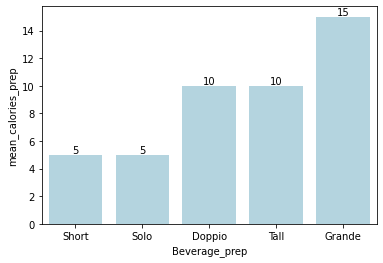

In [85]:
my_plot = sns.barplot(
    x="Beverage_prep",
    y = "mean_calories_prep",
    data = plot_data.sort_values("mean_calories_prep"),
    color = "lightblue"
)

# assign the bar values to each bar by passing containers method to bar_label function
my_plot.bar_label(my_plot.containers[0])

plt.show()